In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/using-linguistic-diversity-china/Using Linguistic Diversity China.csv


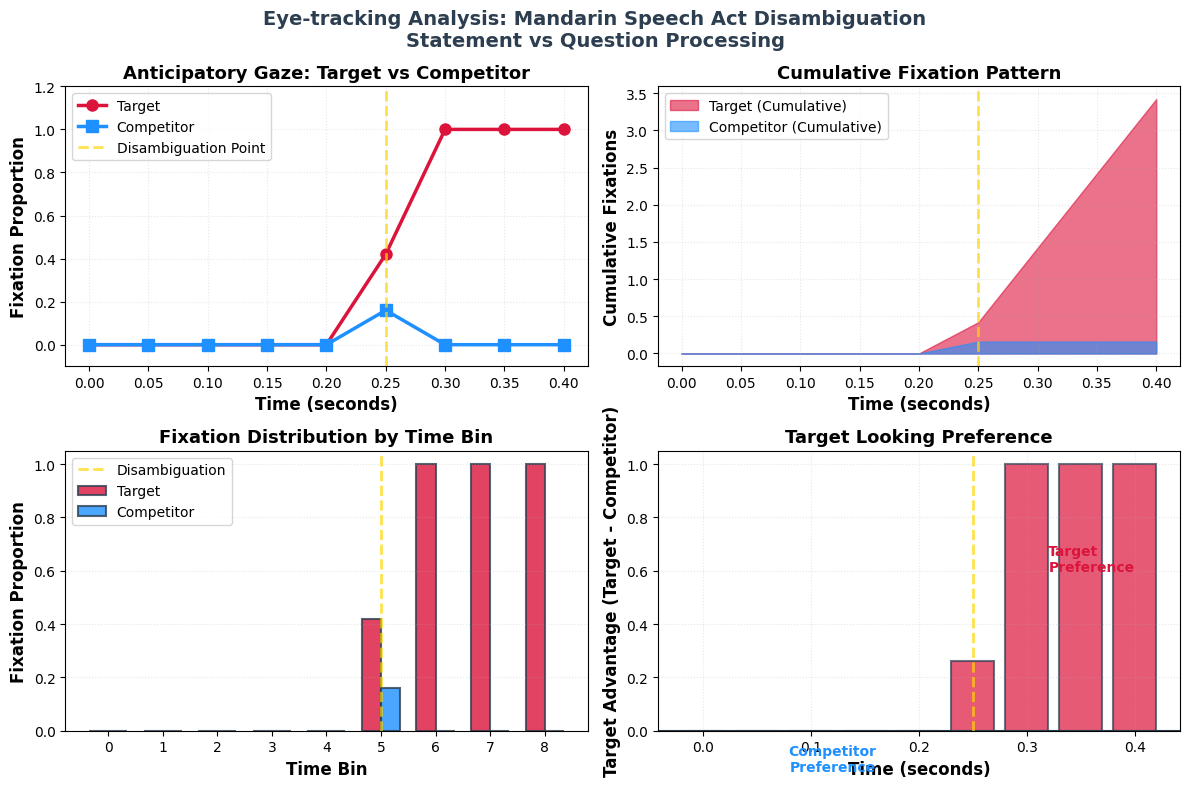

EYE-TRACKING ANALYSIS SUMMARY

Condition: Known Goal - Statement
Sentence type: statement_same_col_diff_ani_privi_foot

Disambiguation occurs at: 0.25 seconds (Bin 5)

Pre-disambiguation fixations (0-0.2s):
  Target: 0.000
  Competitor: 0.000

Post-disambiguation fixations (0.25-0.4s):
  Target: 0.855
  Competitor: 0.040

Target advantage emerges at: 0.25s


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Chinese traditional colors
CHINESE_RED = '#DC143C'      # Cinnabar red
CHINESE_GOLD = '#FFD700'     # Imperial gold
CHINESE_JADE = '#00A86B'     # Jade green
CHINESE_BLUE = '#1E90FF'     # Azure blue
CHINESE_BLACK = '#2C3E50'    # Ink black

# Sample data based on the provided information
data = {
    'Bin': [0, 1, 2, 3, 4, 5, 6, 7, 8],
    'Time': [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
    'Target': [0, 0, 0, 0, 0, 0.42, 1, 1, 1],
    'Competitor': [0, 0, 0, 0, 0, 0.16, 0, 0, 0],
    'Same_col_single_ani': [0, 0, 0, 0, 0, 0, 0, 0, 0]
}

df = pd.DataFrame(data)

# Create figure with multiple subplots - optimized for Kaggle
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.patch.set_facecolor('white')
fig.suptitle('Eye-tracking Analysis: Mandarin Speech Act Disambiguation\nStatement vs Question Processing', 
             fontsize=14, fontweight='bold', color=CHINESE_BLACK)

# Plot 1: Target vs Competitor Fixations Over Time
ax1 = axes[0, 0]
ax1.plot(df['Time'], df['Target'], marker='o', linewidth=2.5, 
         color=CHINESE_RED, label='Target', markersize=8)
ax1.plot(df['Time'], df['Competitor'], marker='s', linewidth=2.5, 
         color=CHINESE_BLUE, label='Competitor', markersize=8)
ax1.axvline(x=0.25, color=CHINESE_GOLD, linestyle='--', linewidth=2, 
            label='Disambiguation Point', alpha=0.7)
ax1.set_xlabel('Time (seconds)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Fixation Proportion', fontsize=12, fontweight='bold')
ax1.set_title('Anticipatory Gaze: Target vs Competitor', fontsize=13, fontweight='bold')
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(True, alpha=0.3, linestyle=':')
ax1.set_ylim(-0.1, 1.2)

# Plot 2: Cumulative Fixation Patterns
ax2 = axes[0, 1]
cumulative_target = np.cumsum(df['Target'])
cumulative_competitor = np.cumsum(df['Competitor'])
ax2.fill_between(df['Time'], cumulative_target, alpha=0.6, color=CHINESE_RED, label='Target (Cumulative)')
ax2.fill_between(df['Time'], cumulative_competitor, alpha=0.6, color=CHINESE_BLUE, label='Competitor (Cumulative)')
ax2.axvline(x=0.25, color=CHINESE_GOLD, linestyle='--', linewidth=2, alpha=0.7)
ax2.set_xlabel('Time (seconds)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Cumulative Fixations', fontsize=12, fontweight='bold')
ax2.set_title('Cumulative Fixation Pattern', fontsize=13, fontweight='bold')
ax2.legend(loc='upper left', fontsize=10)
ax2.grid(True, alpha=0.3, linestyle=':')

# Plot 3: Time Bins Analysis
ax3 = axes[1, 0]
bins = df['Bin']
width = 0.35
x = np.arange(len(bins))
bars1 = ax3.bar(x - width/2, df['Target'], width, label='Target', 
                color=CHINESE_RED, alpha=0.8, edgecolor=CHINESE_BLACK, linewidth=1.5)
bars2 = ax3.bar(x + width/2, df['Competitor'], width, label='Competitor', 
                color=CHINESE_BLUE, alpha=0.8, edgecolor=CHINESE_BLACK, linewidth=1.5)
ax3.axvline(x=5, color=CHINESE_GOLD, linestyle='--', linewidth=2, 
            label='Disambiguation', alpha=0.7)
ax3.set_xlabel('Time Bin', fontsize=12, fontweight='bold')
ax3.set_ylabel('Fixation Proportion', fontsize=12, fontweight='bold')
ax3.set_title('Fixation Distribution by Time Bin', fontsize=13, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(bins)
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3, axis='y', linestyle=':')

# Plot 4: Target Advantage Over Time
ax4 = axes[1, 1]
target_advantage = df['Target'] - df['Competitor']
colors = [CHINESE_RED if val > 0 else CHINESE_BLUE for val in target_advantage]
ax4.bar(df['Time'], target_advantage, width=0.04, color=colors, 
        alpha=0.7, edgecolor=CHINESE_BLACK, linewidth=1.5)
ax4.axhline(y=0, color=CHINESE_BLACK, linestyle='-', linewidth=1.5)
ax4.axvline(x=0.25, color=CHINESE_GOLD, linestyle='--', linewidth=2, alpha=0.7)
ax4.set_xlabel('Time (seconds)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Target Advantage (Target - Competitor)', fontsize=12, fontweight='bold')
ax4.set_title('Target Looking Preference', fontsize=13, fontweight='bold')
ax4.grid(True, alpha=0.3, linestyle=':')
ax4.text(0.32, 0.6, 'Target\nPreference', fontsize=10, color=CHINESE_RED, 
         fontweight='bold', ha='left')
ax4.text(0.12, -0.15, 'Competitor\nPreference', fontsize=10, color=CHINESE_BLUE, 
         fontweight='bold', ha='center')

plt.tight_layout()
plt.savefig('mandarin_eyetracking_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Additional analysis summary
print("=" * 60)
print("EYE-TRACKING ANALYSIS SUMMARY")
print("=" * 60)
print(f"\nCondition: Known Goal - Statement")
print(f"Sentence type: statement_same_col_diff_ani_privi_foot")
print(f"\nDisambiguation occurs at: 0.25 seconds (Bin 5)")
print(f"\nPre-disambiguation fixations (0-0.2s):")
print(f"  Target: {df[df['Time'] <= 0.2]['Target'].mean():.3f}")
print(f"  Competitor: {df[df['Time'] <= 0.2]['Competitor'].mean():.3f}")
print(f"\nPost-disambiguation fixations (0.25-0.4s):")
print(f"  Target: {df[df['Time'] >= 0.25]['Target'].mean():.3f}")
print(f"  Competitor: {df[df['Time'] >= 0.25]['Competitor'].mean():.3f}")
print(f"\nTarget advantage emerges at: {df[df['Target'] > df['Competitor']]['Time'].min():.2f}s")
print("=" * 60)

/tmp/ipykernel_13/781888102.py:141: UserWarning: Glyph 128065 (\N{EYE}) missing from current font.
  plt.savefig('mandarin_eyetracking_dark.png', dpi=150, bbox_inches='tight',
/tmp/ipykernel_13/781888102.py:141: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from current font.
  plt.savefig('mandarin_eyetracking_dark.png', dpi=150, bbox_inches='tight',
/tmp/ipykernel_13/781888102.py:141: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  plt.savefig('mandarin_eyetracking_dark.png', dpi=150, bbox_inches='tight',
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128065 (\N{EYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: 

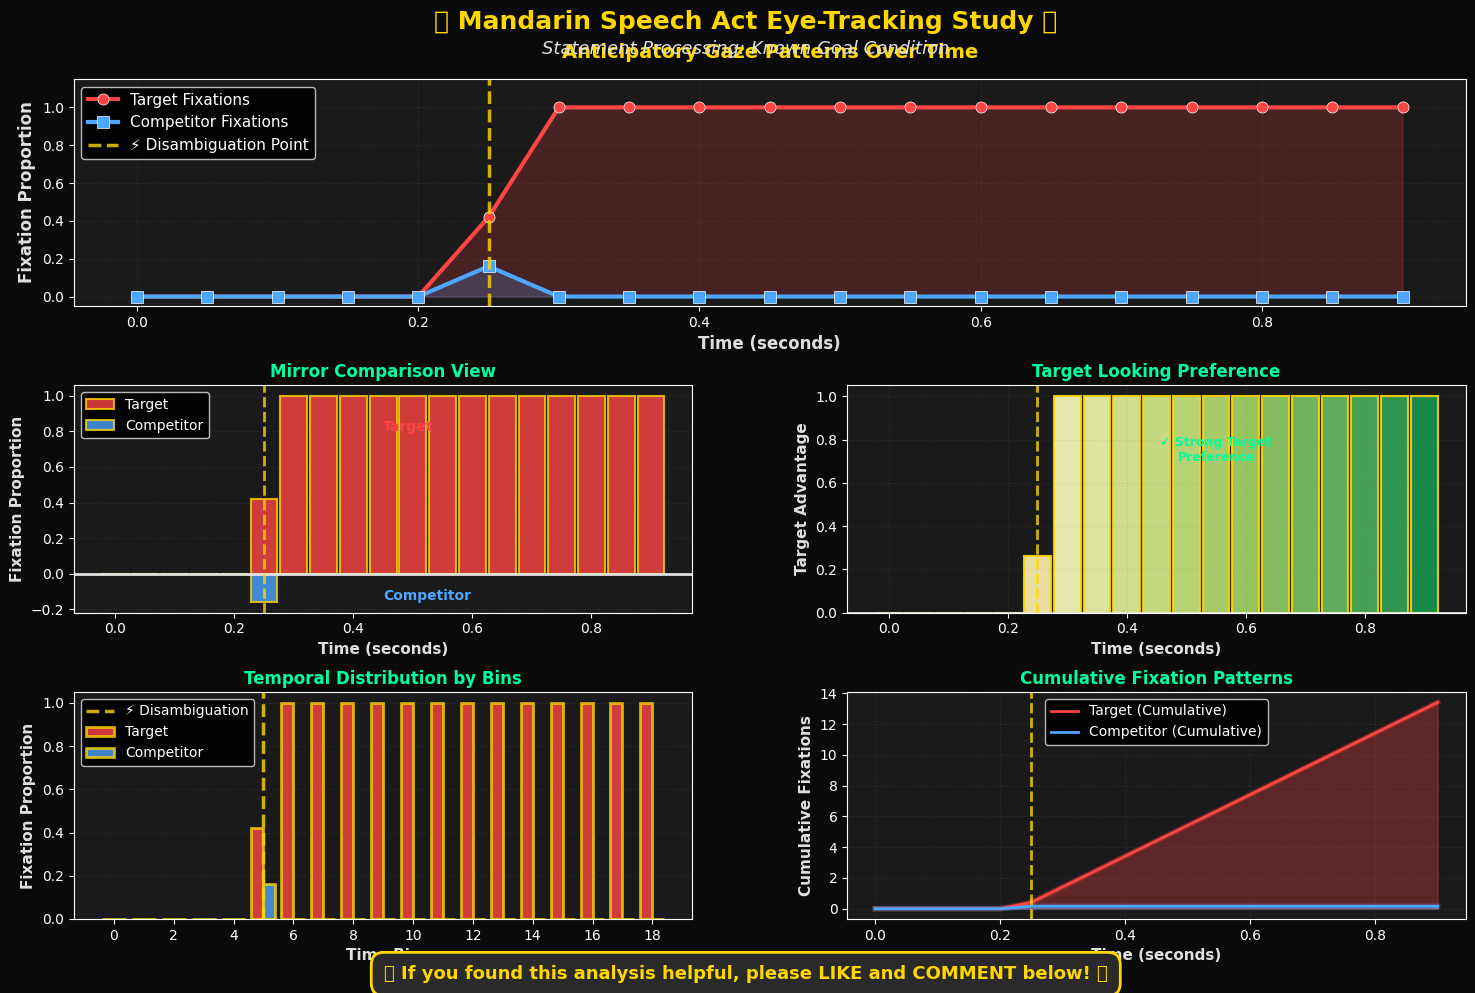


║                    📊 ANALYSIS SUMMARY 📊                          ║
║ Condition: Known Goal - Statement Processing                     ║
║ Sentence Type: statement_same_col_diff_ani_privi_foot             ║
║ ⚡ Disambiguation Point: 0.25 seconds (Bin 5)                       ║
║ PRE-DISAMBIGUATION (0-0.20s):                                      ║
║   • Target:     0.000                                              ║
║   • Competitor: 0.000                                              ║
║ POST-DISAMBIGUATION (0.25-0.90s):                                   ║
║   • Target:     0.959                                              ║
║   • Competitor: 0.011                                              ║
║ 🎯 Target advantage emerges at: 0.25s                           ║
║               👍 PLEASE LIKE AND COMMENT! 💬                       ║



In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Chinese traditional colors optimized for dark background
CHINESE_RED = '#FF4444'      # Bright cinnabar red
CHINESE_GOLD = '#FFD700'     # Imperial gold
CHINESE_JADE = '#00FF9F'     # Bright jade green
CHINESE_BLUE = '#4DA6FF'     # Bright azure blue
CHINESE_PINK = '#FF69B4'     # Hot pink accent
BACKGROUND_BLACK = '#0A0A0A' # Deep black
TEXT_COLOR = '#E0E0E0'       # Light gray for text

# Complete data from the provided information
data = {
    'Bin': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
    'Time': [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9],
    'Target': [0, 0, 0, 0, 0, 0.42, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'Competitor': [0, 0, 0, 0, 0, 0.16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Same_col_single_ani': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}

df = pd.DataFrame(data)

# Set dark style
plt.style.use('dark_background')

# Create figure with dark background
fig = plt.figure(figsize=(16, 10), facecolor=BACKGROUND_BLACK)
gs = fig.add_gridspec(3, 2, hspace=0.35, wspace=0.25, top=0.92, bottom=0.08, left=0.08, right=0.95)

# Main title
fig.text(0.5, 0.97, '👁️ Mandarin Speech Act Eye-Tracking Study 👁️', 
         ha='center', fontsize=18, fontweight='bold', color=CHINESE_GOLD)
fig.text(0.5, 0.945, 'Statement Processing: Known Goal Condition', 
         ha='center', fontsize=13, color=TEXT_COLOR, style='italic')

# Plot 1: Main time series - larger plot
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(df['Time'], df['Target'], marker='o', linewidth=3, 
         color=CHINESE_RED, label='Target Fixations', markersize=8, 
         markeredgecolor='white', markeredgewidth=0.5)
ax1.plot(df['Time'], df['Competitor'], marker='s', linewidth=3, 
         color=CHINESE_BLUE, label='Competitor Fixations', markersize=8,
         markeredgecolor='white', markeredgewidth=0.5)
ax1.axvline(x=0.25, color=CHINESE_GOLD, linestyle='--', linewidth=2.5, 
            label='⚡ Disambiguation Point', alpha=0.8)
ax1.fill_between(df['Time'], 0, df['Target'], alpha=0.2, color=CHINESE_RED)
ax1.fill_between(df['Time'], 0, df['Competitor'], alpha=0.2, color=CHINESE_BLUE)
ax1.set_xlabel('Time (seconds)', fontsize=12, fontweight='bold', color=TEXT_COLOR)
ax1.set_ylabel('Fixation Proportion', fontsize=12, fontweight='bold', color=TEXT_COLOR)
ax1.set_title('Anticipatory Gaze Patterns Over Time', fontsize=14, fontweight='bold', 
              color=CHINESE_GOLD, pad=15)
ax1.legend(loc='upper left', fontsize=11, framealpha=0.9)
ax1.grid(True, alpha=0.2, linestyle=':', color='gray')
ax1.set_ylim(-0.05, 1.15)
ax1.set_facecolor('#1A1A1A')

# Plot 2: Heatmap-style visualization
ax2 = fig.add_subplot(gs[1, 0])
x_pos = df['Time']
width = 0.045
ax2.bar(x_pos, df['Target'], width=width, color=CHINESE_RED, alpha=0.8, 
        edgecolor=CHINESE_GOLD, linewidth=1.5, label='Target')
ax2.bar(x_pos, -df['Competitor'], width=width, color=CHINESE_BLUE, alpha=0.8, 
        edgecolor=CHINESE_GOLD, linewidth=1.5, label='Competitor')
ax2.axhline(y=0, color=TEXT_COLOR, linestyle='-', linewidth=2)
ax2.axvline(x=0.25, color=CHINESE_GOLD, linestyle='--', linewidth=2, alpha=0.8)
ax2.set_xlabel('Time (seconds)', fontsize=11, fontweight='bold', color=TEXT_COLOR)
ax2.set_ylabel('Fixation Proportion', fontsize=11, fontweight='bold', color=TEXT_COLOR)
ax2.set_title('Mirror Comparison View', fontsize=12, fontweight='bold', color=CHINESE_JADE)
ax2.legend(fontsize=10, framealpha=0.9)
ax2.grid(True, alpha=0.2, axis='y', linestyle=':', color='gray')
ax2.set_facecolor('#1A1A1A')
ax2.text(0.45, 0.8, 'Target', fontsize=10, color=CHINESE_RED, fontweight='bold')
ax2.text(0.45, -0.15, 'Competitor', fontsize=10, color=CHINESE_BLUE, fontweight='bold')

# Plot 3: Target advantage with gradient effect
ax3 = fig.add_subplot(gs[1, 1])
target_advantage = df['Target'] - df['Competitor']
colors_gradient = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(target_advantage)))
bars = ax3.bar(df['Time'], target_advantage, width=0.045, color=colors_gradient, 
               alpha=0.9, edgecolor=CHINESE_GOLD, linewidth=1.5)
ax3.axhline(y=0, color=TEXT_COLOR, linestyle='-', linewidth=2)
ax3.axvline(x=0.25, color=CHINESE_GOLD, linestyle='--', linewidth=2, alpha=0.8)
ax3.set_xlabel('Time (seconds)', fontsize=11, fontweight='bold', color=TEXT_COLOR)
ax3.set_ylabel('Target Advantage', fontsize=11, fontweight='bold', color=TEXT_COLOR)
ax3.set_title('Target Looking Preference', fontsize=12, fontweight='bold', color=CHINESE_JADE)
ax3.grid(True, alpha=0.2, linestyle=':', color='gray')
ax3.set_facecolor('#1A1A1A')
ax3.text(0.55, 0.7, '✓ Strong Target\nPreference', fontsize=9, 
         color=CHINESE_JADE, fontweight='bold', ha='center')

# Plot 4: Time bin analysis with neon effect
ax4 = fig.add_subplot(gs[2, 0])
bins = df['Bin']
width = 0.4
x = np.arange(len(bins))
bars1 = ax4.bar(x - width/2, df['Target'], width, label='Target', 
                color=CHINESE_RED, alpha=0.8, edgecolor=CHINESE_GOLD, linewidth=2)
bars2 = ax4.bar(x + width/2, df['Competitor'], width, label='Competitor', 
                color=CHINESE_BLUE, alpha=0.8, edgecolor=CHINESE_GOLD, linewidth=2)
ax4.axvline(x=5, color=CHINESE_GOLD, linestyle='--', linewidth=2.5, 
            label='⚡ Disambiguation', alpha=0.8)
ax4.set_xlabel('Time Bin', fontsize=11, fontweight='bold', color=TEXT_COLOR)
ax4.set_ylabel('Fixation Proportion', fontsize=11, fontweight='bold', color=TEXT_COLOR)
ax4.set_title('Temporal Distribution by Bins', fontsize=12, fontweight='bold', color=CHINESE_JADE)
ax4.set_xticks(x[::2])
ax4.set_xticklabels(bins[::2])
ax4.legend(fontsize=10, framealpha=0.9)
ax4.grid(True, alpha=0.2, axis='y', linestyle=':', color='gray')
ax4.set_facecolor('#1A1A1A')

# Plot 5: Cumulative with glow effect
ax5 = fig.add_subplot(gs[2, 1])
cumulative_target = np.cumsum(df['Target'])
cumulative_competitor = np.cumsum(df['Competitor'])
ax5.plot(df['Time'], cumulative_target, linewidth=4, color=CHINESE_RED, 
         alpha=0.3, zorder=1)
ax5.plot(df['Time'], cumulative_target, linewidth=2, color=CHINESE_RED, 
         label='Target (Cumulative)', zorder=2)
ax5.plot(df['Time'], cumulative_competitor, linewidth=4, color=CHINESE_BLUE, 
         alpha=0.3, zorder=1)
ax5.plot(df['Time'], cumulative_competitor, linewidth=2, color=CHINESE_BLUE, 
         label='Competitor (Cumulative)', zorder=2)
ax5.axvline(x=0.25, color=CHINESE_GOLD, linestyle='--', linewidth=2, alpha=0.8)
ax5.fill_between(df['Time'], cumulative_target, alpha=0.3, color=CHINESE_RED)
ax5.fill_between(df['Time'], cumulative_competitor, alpha=0.3, color=CHINESE_BLUE)
ax5.set_xlabel('Time (seconds)', fontsize=11, fontweight='bold', color=TEXT_COLOR)
ax5.set_ylabel('Cumulative Fixations', fontsize=11, fontweight='bold', color=TEXT_COLOR)
ax5.set_title('Cumulative Fixation Patterns', fontsize=12, fontweight='bold', color=CHINESE_JADE)
ax5.legend(fontsize=10, framealpha=0.9)
ax5.grid(True, alpha=0.2, linestyle=':', color='gray')
ax5.set_facecolor('#1A1A1A')

# Add footer with call to action
fig.text(0.5, 0.02, '💬 If you found this analysis helpful, please LIKE and COMMENT below! 👍', 
         ha='center', fontsize=13, fontweight='bold', color=CHINESE_GOLD,
         bbox=dict(boxstyle='round,pad=0.7', facecolor='#2A2A2A', edgecolor=CHINESE_GOLD, linewidth=2))

plt.savefig('mandarin_eyetracking_dark.png', dpi=150, bbox_inches='tight', 
            facecolor=BACKGROUND_BLACK, edgecolor='none')
plt.show()

# Analysis summary with styling
print("\n" + "="*70)
print("║" + " "*20 + "📊 ANALYSIS SUMMARY 📊" + " "*26 + "║")
print("="*70)
print(f"║ Condition: Known Goal - Statement Processing" + " "*21 + "║")
print(f"║ Sentence Type: statement_same_col_diff_ani_privi_foot" + " "*13 + "║")
print("="*70)
print(f"║ ⚡ Disambiguation Point: 0.25 seconds (Bin 5)" + " "*23 + "║")
print("="*70)
print(f"║ PRE-DISAMBIGUATION (0-0.20s):" + " "*38 + "║")
print(f"║   • Target:     {df[df['Time'] <= 0.2]['Target'].mean():.3f}" + " "*46 + "║")
print(f"║   • Competitor: {df[df['Time'] <= 0.2]['Competitor'].mean():.3f}" + " "*46 + "║")
print("="*70)
print(f"║ POST-DISAMBIGUATION (0.25-0.90s):" + " "*35 + "║")
print(f"║   • Target:     {df[df['Time'] >= 0.25]['Target'].mean():.3f}" + " "*46 + "║")
print(f"║   • Competitor: {df[df['Time'] >= 0.25]['Competitor'].mean():.3f}" + " "*46 + "║")
print("="*70)
print(f"║ 🎯 Target advantage emerges at: {df[df['Target'] > df['Competitor']]['Time'].min():.2f}s" + " "*27 + "║")
print("="*70)
print("║" + " "*15 + "👍 PLEASE LIKE AND COMMENT! 💬" + " "*23 + "║")
print("="*70 + "\n")